In [138]:
import parser
import pandas as pd
import numpy as np
import math
import requests
import json
import os
from matplotlib import pyplot as plt

In [139]:
movies = pd.read_csv("movie_metadata.csv")

In [140]:
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,"1,000","760,505,847",Action|Adventure|Fantasy|Sci-Fi,...,"3,054",English,USA,PG-13,"237,000,000","2,009",936,8,2,33000
1,Color,Gore Verbinski,302,169,563,"1,000",Orlando Bloom,"40,000","309,404,152",Action|Adventure|Fantasy,...,"1,238",English,USA,PG-13,"300,000,000","2,007","5,000",7,2,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,"11,000","200,074,175",Action|Adventure|Thriller,...,994,English,UK,PG-13,"245,000,000","2,015",393,7,2,85000
3,Color,Christopher Nolan,813,164,"22,000","23,000",Christian Bale,"27,000","448,130,642",Action|Thriller,...,"2,701",English,USA,PG-13,"250,000,000","2,012","23,000",8,2,164000
4,NaN,Doug Walker,nan,nan,131,nan,Rob Walker,131,nan,Documentary,...,nan,NaN,NaN,NaN,nan,nan,12,7,nan,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1,87,2,318,Daphne Zuniga,637,nan,Comedy|Drama,...,6,English,Canada,NaN,nan,"2,013",470,8,nan,84
5039,Color,NaN,43,43,nan,319,Valorie Curry,841,nan,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,nan,nan,593,8,16,32000
5040,Color,Benjamin Roberds,13,76,0,0,Maxwell Moody,0,nan,Drama|Horror|Thriller,...,3,English,USA,NaN,"1,400","2,013",0,6,nan,16
5041,Color,Daniel Hsia,14,100,0,489,Daniel Henney,946,"10,443",Comedy|Drama|Romance,...,9,English,USA,PG-13,nan,"2,012",719,6,2,660


In [141]:
movies2 = movies[['movie_title', 'budget', 'gross', 'cast_total_facebook_likes', 'imdb_score']]
movies2

,movie_title,budget,gross,cast_total_facebook_likes,imdb_score
0,Avatar,"237,000,000","760,505,847",4834,8
1,Pirates of the Caribbean: At World's End,"300,000,000","309,404,152",48350,7
2,Spectre,"245,000,000","200,074,175",11700,7
3,The Dark Knight Rises,"250,000,000","448,130,642",106759,8
4,Star Wars: Episode VII - The Force Awakens ...,nan,nan,143,7
...,...,...,...,...,...
5038,Signed Sealed Delivered,nan,nan,2283,8
5039,The Following,nan,nan,1753,8
5040,A Plague So Pleasant,"1,400",nan,0,6
5041,Shanghai Calling,nan,"10,443",2386,6


In [142]:
movies2 = movies2.dropna() #drops null values
movies2

,movie_title,budget,gross,cast_total_facebook_likes,imdb_score
0,Avatar,"237,000,000","760,505,847",4834,8
1,Pirates of the Caribbean: At World's End,"300,000,000","309,404,152",48350,7
2,Spectre,"245,000,000","200,074,175",11700,7
3,The Dark Knight Rises,"250,000,000","448,130,642",106759,8
5,John Carter,"263,700,000","73,058,679",1873,7
...,...,...,...,...,...
5033,Primer,"7,000","424,760",368,7
5034,Cavite,"7,000","70,071",0,6
5035,El Mariachi,"7,000","2,040,920",147,7
5037,Newlyweds,"9,000","4,584",690,6


In [143]:
# pd.to_numeric(movies2.imdb_score)
pd.options.display.float_format = '{:,.0f}'.format
movies2

,movie_title,budget,gross,cast_total_facebook_likes,imdb_score
0,Avatar,"237,000,000","760,505,847",4834,8
1,Pirates of the Caribbean: At World's End,"300,000,000","309,404,152",48350,7
2,Spectre,"245,000,000","200,074,175",11700,7
3,The Dark Knight Rises,"250,000,000","448,130,642",106759,8
5,John Carter,"263,700,000","73,058,679",1873,7
...,...,...,...,...,...
5033,Primer,"7,000","424,760",368,7
5034,Cavite,"7,000","70,071",0,6
5035,El Mariachi,"7,000","2,040,920",147,7
5037,Newlyweds,"9,000","4,584",690,6


In [144]:
# X = movies2.iloc[:,:-1]
X = movies2
X

,movie_title,budget,gross,cast_total_facebook_likes,imdb_score
0,Avatar,"237,000,000","760,505,847",4834,8
1,Pirates of the Caribbean: At World's End,"300,000,000","309,404,152",48350,7
2,Spectre,"245,000,000","200,074,175",11700,7
3,The Dark Knight Rises,"250,000,000","448,130,642",106759,8
5,John Carter,"263,700,000","73,058,679",1873,7
...,...,...,...,...,...
5033,Primer,"7,000","424,760",368,7
5034,Cavite,"7,000","70,071",0,6
5035,El Mariachi,"7,000","2,040,920",147,7
5037,Newlyweds,"9,000","4,584",690,6


In [145]:
from sklearn import metrics, svm                        
from sklearn.linear_model import LogisticRegression         
from sklearn import preprocessing
from sklearn import utils

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X = X.apply(LabelEncoder().fit_transform)
X #sets numerical values to each index based on increasing value
#for example, for budget, 1 will mean the lowest budget value,
#2 is the second lowest and so on

,movie_title,budget,gross,cast_total_facebook_likes,imdb_score
0,294,354,3768,1690,60
1,2098,360,3718,3208,52
2,2509,355,3613,2032,49
3,2849,356,3760,3316,66
5,1479,359,2951,751,47
...,...,...,...,...,...
5033,2144,3,347,153,51
5034,555,3,143,0,44
5035,895,3,588,68,50
5037,1930,4,17,264,45


In [146]:
y = X.iloc[:,4]
y

0       60
1       52
2       49
3       66
5       47
        ..
5033    51
5034    44
5035    50
5037    45
5042    47
Name: imdb_score, Length: 3891, dtype: int64

In [147]:
max(y)

73

In [148]:
# lab_enc = preprocessing.LabelEncoder()
# training_scores_encoded = lab_enc.fit_transform(y)
# print(training_scores_encoded)
# print(utils.multiclass.type_of_target(y))
# print(utils.multiclass.type_of_target(y.astype('int')))
# print(utils.multiclass.type_of_target(training_scores_encoded))
X = movies2.iloc[:,:-1]
labelencoder_X = LabelEncoder()
X = X.apply(LabelEncoder().fit_transform)
X

,movie_title,budget,gross,cast_total_facebook_likes
0,294,354,3768,1690
1,2098,360,3718,3208
2,2509,355,3613,2032
3,2849,356,3760,3316
5,1479,359,2951,751
...,...,...,...,...
5033,2144,3,347,153
5034,555,3,143,0
5035,895,3,588,68
5037,1930,4,17,264


In [149]:
# clf = LogisticRegression()
# clf.fit(X, training_scores_encoded)
# print("LogisticRegression")
# print(clf.predict(X))
#Dont use this for now

In [150]:
from sklearn.tree import DecisionTreeClassifier
regressor = DecisionTreeClassifier()
regressor.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [151]:
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier()
# model.fit(X,y)

In [152]:
X_in = np.array([1884,1,159, 3])
y_pred = regressor.predict([X_in])
y_pred

array([51], dtype=int64)

In [153]:
# from sklearn.externals.six import StringIO
# from IPython.display import Image
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = StringIO()
# export_graphviz(regressor, out_file = dot_data, filled = True, rounded = True, special_characters = True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [154]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,y,random_state=42,test_size=.1)

Training:0.05969722936303913
Test:0.041025641025641026


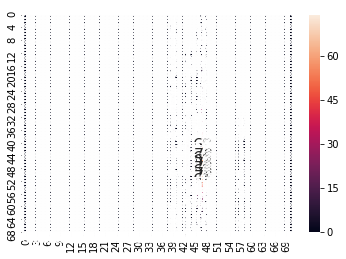

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [155]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

clf = DecisionTreeClassifier(max_depth=3).fit(X_train,Y_train)
print("Training:"+str(clf.score(X_train,Y_train)))
print("Test:"+str(clf.score(X_test,Y_test)))
pred = clf.predict(X_train)
confusion_matrix = confusion_matrix(y_true=Y_train,y_pred=pred)

sns.heatmap(confusion_matrix,annot=True,annot_kws={"size":16})
plt.show()

confusion_matrix

In [156]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(regressor, out_file = dot_data, filled = True,
               rounded = True, special_characters = True)
graph2 = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('tree.png') #prints out the tree pic
graph2

In [157]:
print("precision score : "+str(precision_score(Y_train,pred,average='micro')*1000)) # tp/tp+fp
# print("accuracy score : "+str(accuracy_score(Y_train,pred))) # total correct 
# print("recall score : "+str(recall_score(Y_train,pred,average='micro')))   # tp/tp+fn
# print("f1 score : "+str(f1_score(Y_train,pred, average='micro'))) 

precision score : 59.69722936303913


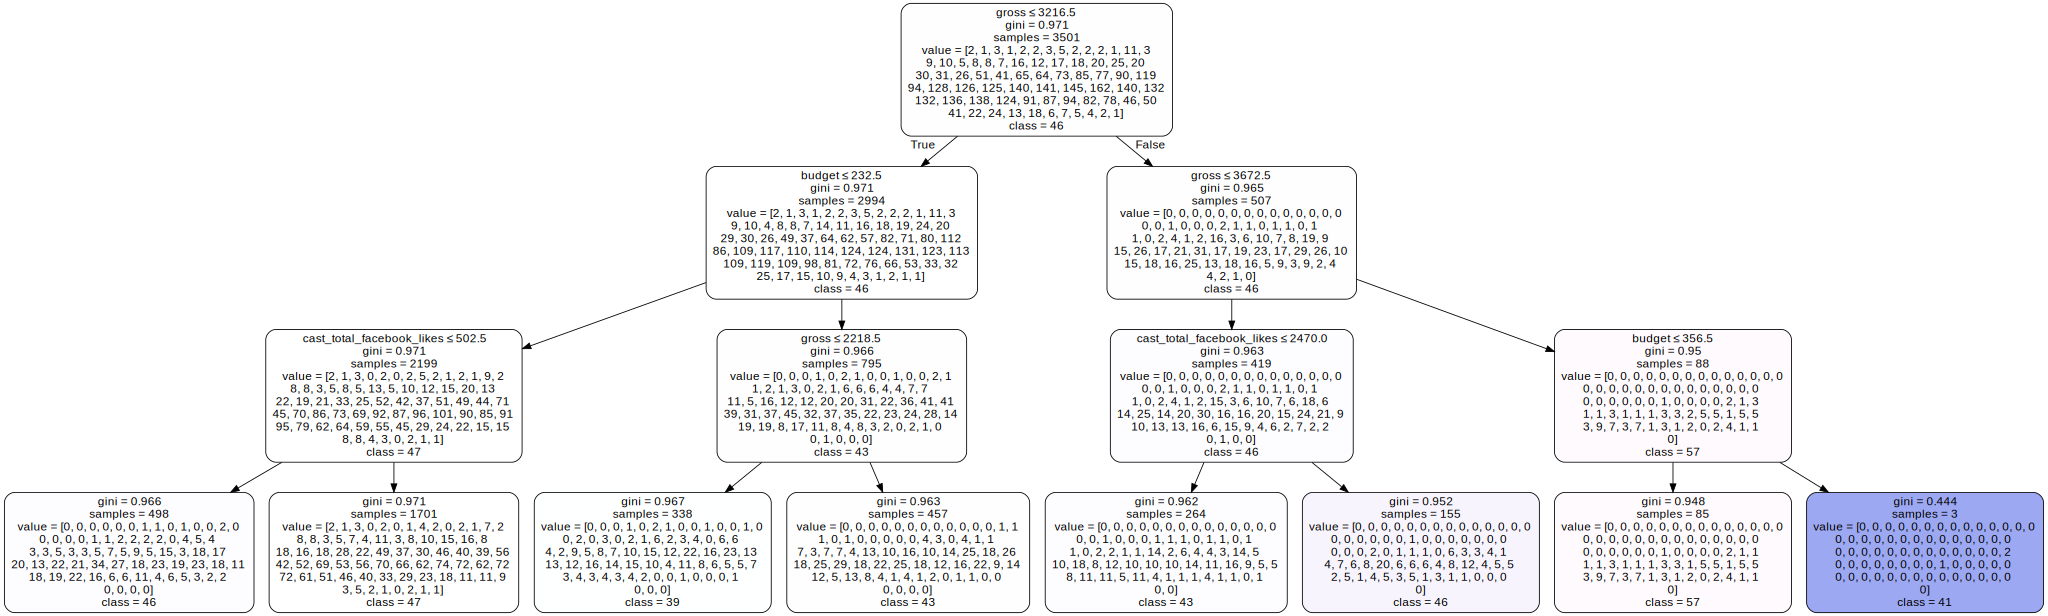

In [158]:
feat_names = X.columns
# targ_names = ['0', '1','2','3']
targ_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8','9','10',
             '11', '12', '13', '14', '15', '16', '17', '18','19','20',
             '21', '22', '23', '24', '25', '26', '27', '28','29','30',
             '31', '32', '33', '34', '35', '36', '37', '38','39','40',
             '41', '42', '43', '44', '45', '46', '47', '48','49','50',
             '51', '52', '53', '54', '55', '56', '57', '58','59','60',
             '61', '62', '63', '64', '65', '66', '67', '68','69','70',
              '71','72','73']
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
import matplotlib.pyplot as plt 


data = export_graphviz(clf,out_file=None,feature_names=feat_names,class_names=targ_names,   
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(data)
# graph.write_png('tree2.png') #prints out the tree pic
graph

In [159]:
print ("accuracy",metrics.accuracy_score(Y_train, pred))
print ("f1 score micro",metrics.f1_score(Y_train, pred, average='micro')) 
print ("precision score",metrics.precision_score(Y_train, pred, average='macro'))
print ("recall score",metrics.recall_score(Y_train, pred, average='macro'))
print ("hamming_loss",metrics.hamming_loss(Y_train, pred))
print ("classification_report", metrics.classification_report(Y_train, pred))
print ("jaccard_similarity_score", metrics.jaccard_similarity_score(Y_train, pred))
print ("zero_one_loss", metrics.zero_one_loss(Y_train, pred))

accuracy 0.05969722936303913
f1 score micro 0.05969722936303913
precision score 0.014534967194253645
recall score 0.02216278211183815
hamming_loss 0.9403027706369609
classification_report               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00         3
 

C:\Users\ukhat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ukhat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ukhat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
